import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],
                    [8.9],[5.2],[8.59],[2.1],[8],
                    [10],[4.5],[6],[4]],
                   dtype = np.float32)

y_train = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],[3.3567],
                    [2.6],[1.96],[3.53],[1.76],[3.2],
                    [3.5],[1.6],[2.5],[2.2]],
                   dtype = np.float32)

plt.figure(figsize=(12,8))

plt.scatter(x_train,y_train, label ='Original data',s=250, c='g')

plt.legend()
plt.show()

In [5]:
import torch

In [7]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad_for X_train: ', X_train.requires_grad)
print('requires_grad_for Y_train: ', Y_train.requires_grad)

requires_grad_for X_train:  False
requires_grad_for Y_train:  False


### Since we have just one neuron and we have just one x , we will have 

In [8]:
input_size=1
hidden_size=1
output_size=1

In [10]:
# w1 contains the weights for the input to our neural network

w1 = torch.rand(input_size,
                hidden_size,
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [11]:
# w2 is the weight which corresponds to the connection between the hidden layer and the final output
w2 = torch.rand(input_size,
                output_size,
                
                requires_grad=True)
w2.shape

torch.Size([1, 1])

In [12]:
# Design hyperparamter

learning_rate = 1e-6


In [44]:
for iter in range(1,6000):
    
    y_pred = X_train.mm(w1).mm(w2)
    # Perform a forward pass through the the neural network constructed using a single linear
    # neuron with no activation function
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 4.089203357696533
100 4.089203357696533
150 4.089203357696533
200 4.089203357696533
250 4.089203357696533
300 4.089203357696533
350 4.089203357696533
400 4.089203357696533
450 4.089203357696533
500 4.089203357696533
550 4.089203357696533
600 4.089203357696533
650 4.089203357696533
700 4.089203357696533
750 4.089203357696533
800 4.089203357696533
850 4.089203357696533
900 4.089203357696533
950 4.089203357696533
1000 4.089203357696533
1050 4.089203357696533
1100 4.089203357696533
1150 4.089203357696533
1200 4.089203357696533
1250 4.089203357696533
1300 4.089203357696533
1350 4.089203357696533
1400 4.089203357696533
1450 4.089203357696533
1500 4.089203357696533
1550 4.089203357696533
1600 4.089203357696533
1650 4.089203357696533
1700 4.089203357696533
1750 4.089203357696533
1800 4.089203357696533
1850 4.089203357696533
1900 4.089203357696533
1950 4.089203357696533
2000 4.089203357696533
2050 4.089203357696533
2100 4.089203357696533
2150 4.089203357696533
2200 4.089203357696533
2250 4.0

In [45]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.9205]], requires_grad=True)
w2:  tensor([[0.4309]], requires_grad=True)


In [46]:
x_train_tensor = torch.from_numpy(x_train)

x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [47]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8641],
        [0.9519],
        [2.9747],
        [2.8160],
        [1.7055],
        [3.1000],
        [3.5300],
        [2.0625],
        [3.4070],
        [0.8329],
        [3.1730],
        [3.9663],
        [1.7848],
        [2.3798],
        [1.5865]], grad_fn=<MmBackward0>)

In [48]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8641435 ],
       [0.95190316],
       [2.974697  ],
       [2.8160465 ],
       [1.7054931 ],
       [3.100031  ],
       [3.529974  ],
       [2.0624566 ],
       [3.4070199 ],
       [0.8329151 ],
       [3.1730103 ],
       [3.9662628 ],
       [1.7848183 ],
       [2.3797576 ],
       [1.5865052 ]], dtype=float32)

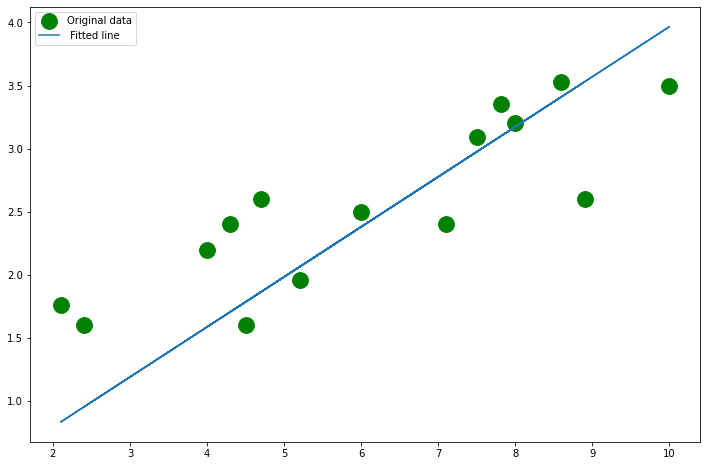

In [49]:
plt.figure(figsize=(12,8))

plt.scatter(x_train,y_train, label ='Original data',s=250, c='g')

plt.plot(x_train,predicted,label = ' Fitted line ')

plt.legend()
plt.show()